# Investigating the Correlation Between Daily Social Media Usage and Sleep Time in Graduate, Undergraduate, and Highschool Students

## Introduction

In recent years, the ever-increasing use of social media has raised growing concerns regarding mental health, sleep patterns and its addictive nature. Students, in particular, make up the largest demographic on many social media platforms and thus also suffer the most from their harmful side effects. During the formative years of high school students, mental health, restful sleep and self regulation are especially important, as they often have lasting impacts into adulthood. 

This project investigates the relationship between the time spent on social media on a daily basis and sleep duration among high school, undergraduate and graduate students. By means of analyzing survey data, the project aims to determine if high social media usage is associated with reduced sleep time and how this relationship manifests itself differently across academic levels. The purpose of this study is to inform students, teachers and professors, as well as policy makers about the possible harmful effects of excessive social media usage on student's well-being and academic success.

## Dataset

“Social Media Addiction & Relationships”
Creator: Adil Shamim
© Adil Shamim, licensed under [Creative Commons Attribution 4.0 International License (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)
Dataset link: https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships/data

## Code

### Importing Packages

All required libraries for data analysis, preprocessing, modeling, and visualization are imported. Includes tools for:
- Data manipulation (`pandas`, `numpy`)
- Statistical analysis (`scipy.stats`)
- Machine learning models and metrics (`sklearn`, `RandomForestRegressor`, `LinearRegression`)
- Deep learning (`TensorFlow Keras`)
- Data preprocessing (`LabelEncoder`, `StandardScaler`)
- Country name conversion (`country_converter`)
- Plotting and visualization (`plotly`, `seaborn`, `matplotlib`)

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import R2Score
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

### Loading data into pandas

The data is loaded into pandas, and the first five rows are displayed. An extensive amount of variables is included, ranging from Age, Gender, and Academic Level to Relationship Status.

In [5]:
df = pd.read_csv("/kaggle/input/social-media-addiction-vs-relationships/Students Social Media Addiction.csv")
df.head(5)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


### Analyzing The Data

The `.describe()` method shows important statistics for all numerical variables in the dataset. This includes row counts, means, standard deviations and quantiles. For instance, it shows that a total of 705 different students have participated in the survey. It is also visible that average daily usage hours range from 1.5 hours up to 8.5 hours.

In [6]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


Checking for missing values (NAs) shows that there are no empty values for any of the rows.

In [7]:
df.isnull().values.any()

False

### Visualizing the data

Setting up Seaborn for data visualizations

In [8]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

#### Age and Academic Level distributions of participants

<Axes: xlabel='Age', ylabel='Count'>

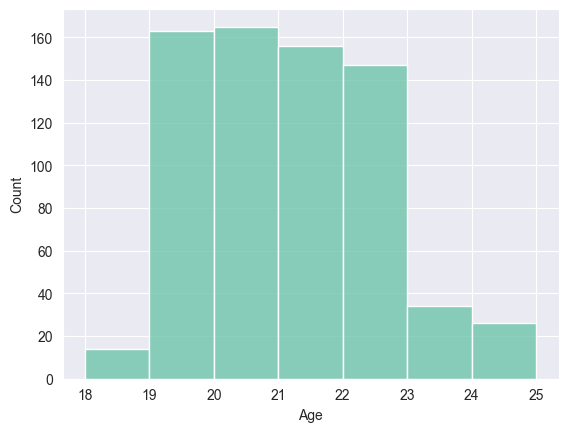

In [9]:
sns.histplot(data=df, x="Age", bins=range(df["Age"].min(), df["Age"].max() + 2))

<Axes: xlabel='Academic_Level', ylabel='Count'>

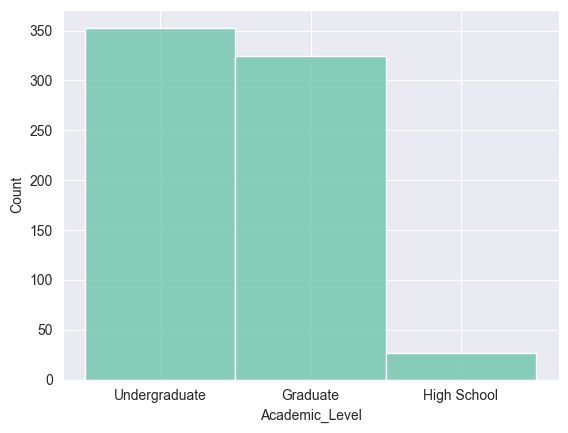

In [10]:
sns.histplot(data=df, x="Academic_Level")

#### Visualizing the average daily social media usage (Y-axis) by academic level (X-axis). 

The image shows that the daily usage varies widely among undergraduate students, ranging from approximately 2 hours to up to more than 8 hours. The median here is 4.8 hours per day and most undergraduates tend to spend between 4.1 to 5.9 hours daily on social media. 

Furthermore, graduate students vary slightly less in terms of daily usage, as their values range from 2 hours up to 7.5 hours daily. Their median is approximately 4.75 hours per day, with most spending between 4 and 5.6 hours on social media each day. One outlier in this group presented a value of approximately 1.5 hours.

Lastly, high school students have the least variability in daily usage out of the three groups, their median however is at about 5.6 hours per day, which is significantly higher than the other two groups (approx. 1 hour more per day). They tend to spend between 5.5 and 5.8 hours of their day on social media. Three outliers are present, two of which consume significantly less social media content daily than the central tendency. Note that the high school students group has significantly less samples than the other two groups, results could thus be skewed.

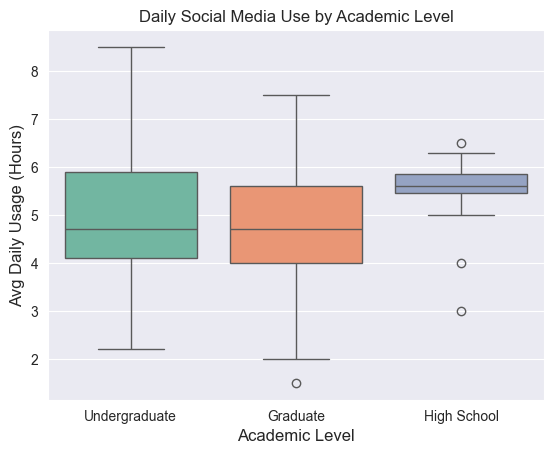

In [11]:
sns.boxplot(x="Academic_Level", y="Avg_Daily_Usage_Hours", data=df, hue="Academic_Level", legend=False)
plt.title("Daily Social Media Use by Academic Level")
plt.xlabel("Academic Level", fontsize=12)
plt.ylabel("Avg Daily Usage (Hours)", fontsize=12)
plt.show()

#### Visualizing addiction scale (Y-axis) by academic level (X-axis). 

Addiction scores vary greatly among undergraduates, most presenting scores between 5 and 8. Graduates typically show scores between 5 and 7, while almost all high schooler students surveyed have reported their addiction scale to be 8 or 9. There are only two outliers in the high school students' group, those reporting an addiction score of 4 and 5 respectively. 

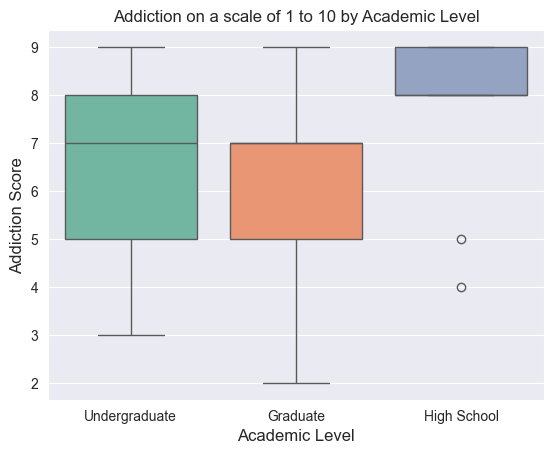

In [12]:
sns.boxplot(x="Academic_Level", y="Addicted_Score", data=df, hue="Academic_Level", legend=False)
plt.title("Addiction on a scale of 1 to 10 by Academic Level")
plt.xlabel("Academic Level", fontsize=12)
plt.ylabel("Addiction Score", fontsize=12)
plt.show()

#### Visualizing the average daily social media usage (Y-axis) by age (X-axis).

The visualization below shows that most ages have a similar median regarding daily social media usage. Interestingly, 18 and 24 year old students have a similar median. Note that these two age groups are underrepresented in the survey in comparison to other ages, as these have the lowest participant counts.

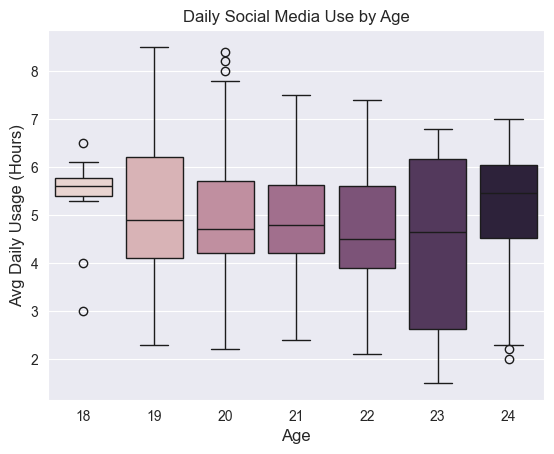

In [13]:
sns.boxplot(x="Age", y="Avg_Daily_Usage_Hours", data=df, hue="Age", legend=False)
plt.title("Daily Social Media Use by Age")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Avg Daily Usage (Hours)", fontsize=12)
plt.show()

#### Visualizing addiction score (Y-axis) by age (X-axis). 

Most age groups have a similar median addiction score of 7. 18 year old students have the highest median with an addiction score of 8. Interestingly, 23 year olds strongly differ from the norm, having a median score of 5, while 24 year olds again conform to it. Note that the data amount of 23 and 24 year olds that participated in the study is significantly lower than the rest, thus their results may be underrepresented.

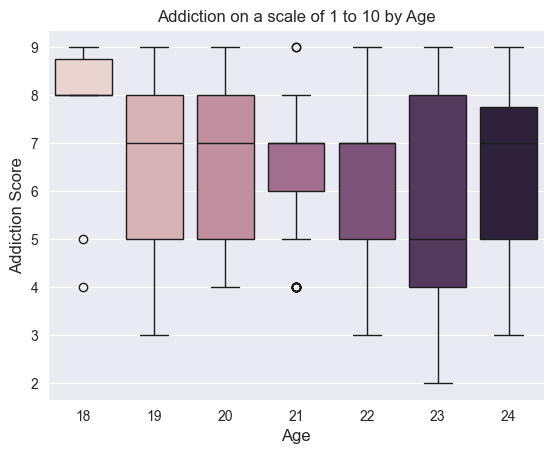

In [14]:
sns.boxplot(x="Age", y="Addicted_Score", data=df, hue="Age", legend=False)
plt.title("Addiction on a scale of 1 to 10 by Age")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Addiction Score", fontsize=12)
plt.show()

#### Visualizing hours of sleep (Y-axis) by academic level (X-axis). 

The image below shows the amount of sleep that the students get per night by academic level. The medians for undergraduate and graduate students are similar, at approximately 
6.9 and 7.1 hours respectively. High school students on the other hand get a median of 5.5 hours per night, significantly less than the other groups.

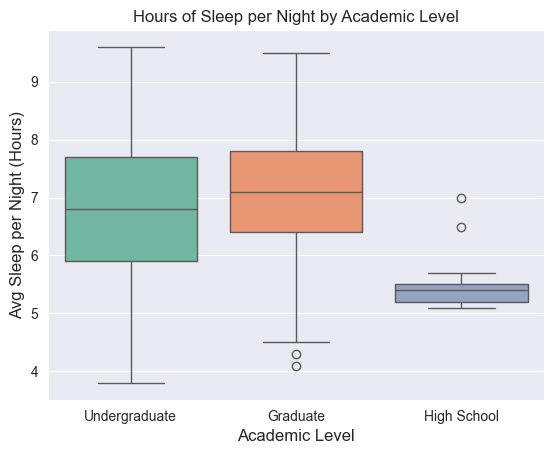

In [15]:
sns.boxplot(x="Academic_Level", y="Sleep_Hours_Per_Night", data=df, hue="Academic_Level", legend=False)
plt.title("Hours of Sleep per Night by Academic Level")
plt.xlabel("Academic Level", fontsize=12)
plt.ylabel("Avg Sleep per Night (Hours)", fontsize=12)
plt.show()

#### Visualizing counts affected academic performance (Y-axis) by academic level (X-axis). 

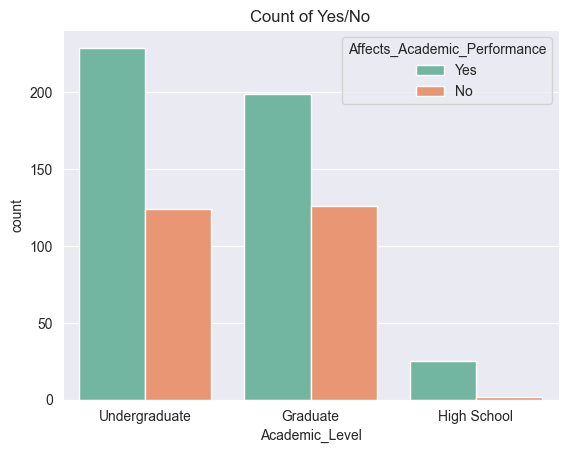

In [16]:
sns.countplot(data=df, x='Academic_Level', hue="Affects_Academic_Performance")
plt.title("Count of Yes/No")
plt.show()

#### Visualizing sleep time (Y-axis) by addiction score (X-axis)

The plot below shows a clear negative relationship between the addiction score and the amount of sleep students get. The higher the addiction score, the less the student sleeps per night.

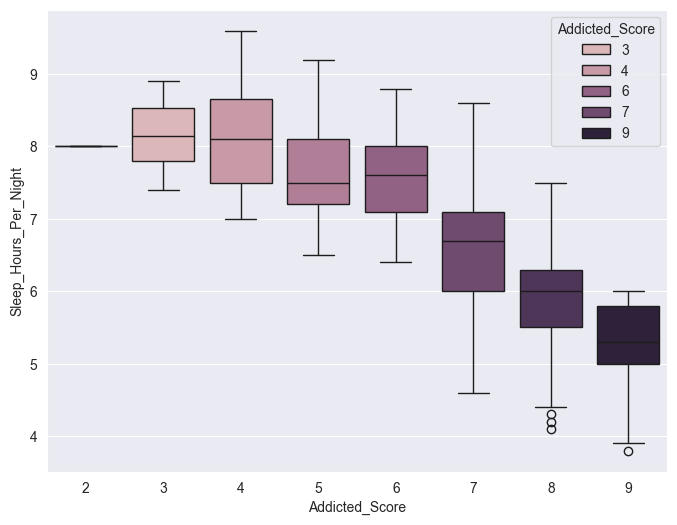

In [17]:
plt.subplots(figsize=(8,6))
sns.boxplot(x="Addicted_Score", y="Sleep_Hours_Per_Night", hue="Addicted_Score",data=df)
plt.show()

#### Visualizing Addiction Score (Y-axis) by Social Media Platform (X-axis)

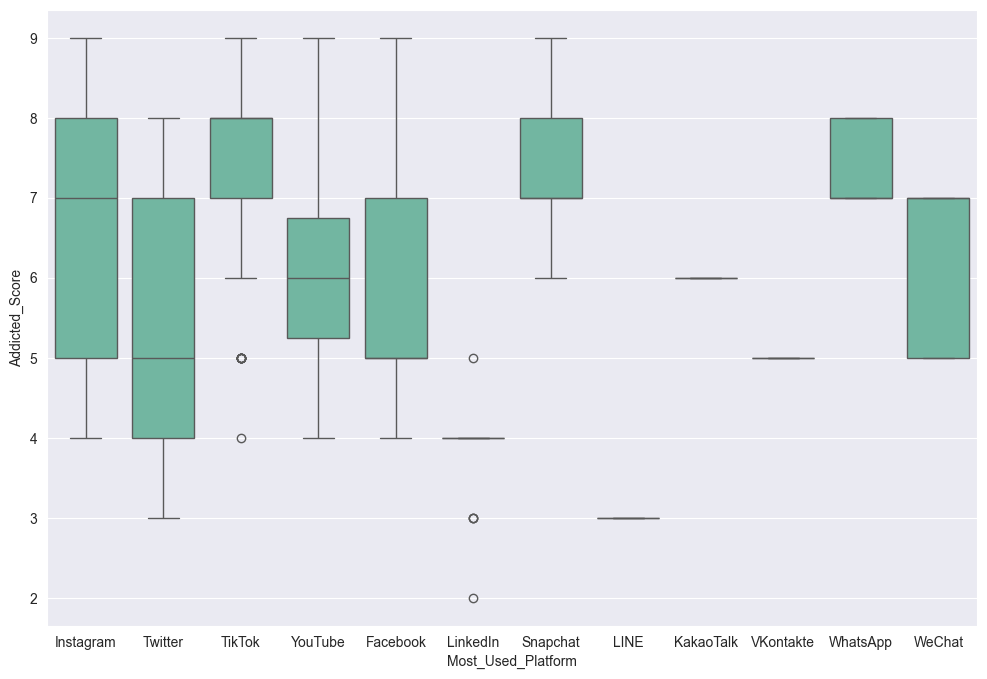

In [18]:
plt.subplots(figsize=(12,8))
sns.boxplot(x="Most_Used_Platform", y="Addicted_Score", data=df)
plt.show()

#### Correlation Strength between Addicted Score and Sleep Hours per Night

In [19]:
df["Addicted_Score"].corr(df["Sleep_Hours_Per_Night"], method="spearman")

-0.7879750806654222

<Axes: xlabel='Addicted_Score', ylabel='Sleep_Hours_Per_Night'>

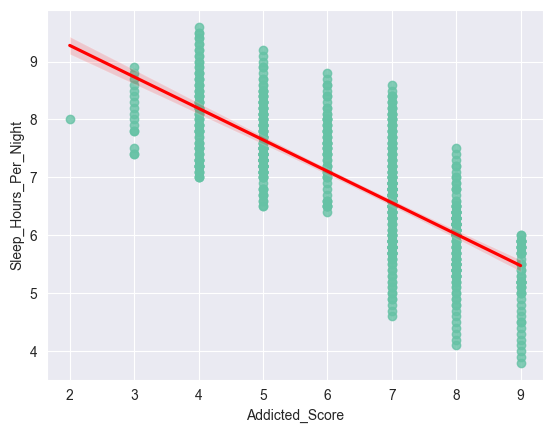

In [20]:
sns.regplot(x="Addicted_Score", y="Sleep_Hours_Per_Night", data=df, line_kws={"color":"red"})

#### Correlation Strength between Average daily usage hours and Sleep Hours per Night

In [21]:
df["Sleep_Hours_Per_Night"].corr(df["Avg_Daily_Usage_Hours"], method="spearman")

-0.8144747507422089

<Axes: xlabel='Avg_Daily_Usage_Hours', ylabel='Sleep_Hours_Per_Night'>

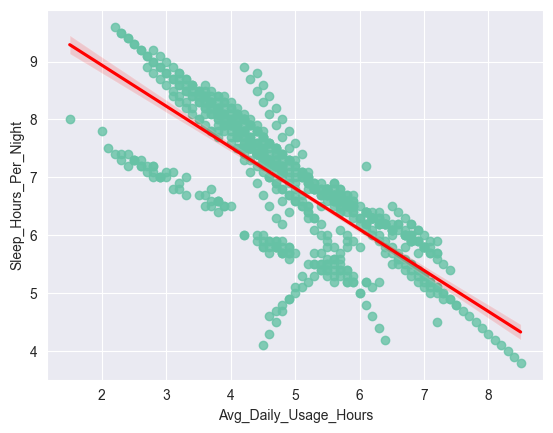

In [22]:
sns.regplot(x="Avg_Daily_Usage_Hours", y="Sleep_Hours_Per_Night", data=df, line_kws={"color":"red"})

### Converting Categorical Variable Labels into Numerical Variables For Regression

In [23]:
encoder = LabelEncoder()
df["Gender_Numeric"] = encoder.fit_transform(df["Gender"])
df["Most_Used_Platform_Numeric"] = encoder.fit_transform(df["Most_Used_Platform"])
df["Academic_Level_Numeric"] = encoder.fit_transform(df["Academic_Level"])
df["Normalized_Addicted_Score"] = df["Addicted_Score"] / 10
df["Relationship_Status_Numeric"] = encoder.fit_transform(df["Relationship_Status"])
df["Is_Graduate"] = (df["Academic_Level"] == "Graduate").astype(int)
df["In_Relationship"] = (df["Relationship_Status"] == "In Relationship").astype(int)
df["Affects_Academic_Performance_Numeric"] = encoder.fit_transform(df["Affects_Academic_Performance"])

df.head(5)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,...,Conflicts_Over_Social_Media,Addicted_Score,Gender_Numeric,Most_Used_Platform_Numeric,Academic_Level_Numeric,Normalized_Addicted_Score,Relationship_Status_Numeric,Is_Graduate,In_Relationship,Affects_Academic_Performance_Numeric
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,...,3,8,0,1,2,0.8,1,0,1,1
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,...,0,3,1,7,0,0.3,2,1,0,0
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,...,4,9,0,6,2,0.9,0,0,0,1
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,...,1,4,1,11,1,0.4,2,0,0,0
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,...,2,7,1,0,0,0.7,1,1,1,1


Let's take a look at the relationships between variables. We can see that there definitely is a clear linear relationship between average daily usage hours and sleep hours per night.

In [24]:
correlation_values = df[["Avg_Daily_Usage_Hours", "Is_Graduate", "Addicted_Score", "Mental_Health_Score", "Age", "Conflicts_Over_Social_Media", "Affects_Academic_Performance_Numeric", "Gender_Numeric", "Most_Used_Platform_Numeric", "Relationship_Status_Numeric"]].corrwith(df["Sleep_Hours_Per_Night"], method="spearman")
correlation_values

Avg_Daily_Usage_Hours                  -0.814475
Is_Graduate                             0.137891
Addicted_Score                         -0.787975
Mental_Health_Score                     0.733767
Age                                     0.132088
Conflicts_Over_Social_Media            -0.722524
Affects_Academic_Performance_Numeric   -0.640710
Gender_Numeric                          0.044260
Most_Used_Platform_Numeric             -0.291847
Relationship_Status_Numeric             0.125892
dtype: float64

Only variables with an absolute correlation score higher than 0.6 are kept.

In [25]:
correlation_values = correlation_values[correlation_values.abs() > 0.6]
correlation_values

Avg_Daily_Usage_Hours                  -0.814475
Addicted_Score                         -0.787975
Mental_Health_Score                     0.733767
Conflicts_Over_Social_Media            -0.722524
Affects_Academic_Performance_Numeric   -0.640710
dtype: float64

The input for the models will be the variables from above, from which they will predict the sleep hours per night of the students. 

In [26]:
x = df[correlation_values.index]
y = df["Sleep_Hours_Per_Night"]

Data is split into a training split (80%) and test split (20%).

In [27]:
x_train = x.iloc[:int(len(df)*0.8)].to_numpy()
x_test = x.iloc[int(len(df)*0.8):].to_numpy()

y_train = y.iloc[:int(len(df)*0.8)].to_numpy()
y_test = y.iloc[int(len(df)*0.8):].to_numpy()

In [28]:
x_train

array([[5.2, 8. , 6. , 3. , 1. ],
       [2.1, 3. , 8. , 0. , 0. ],
       [6. , 9. , 5. , 4. , 1. ],
       ...,
       [3.9, 5. , 7. , 2. , 0. ],
       [3.2, 4. , 8. , 2. , 0. ],
       [4.1, 6. , 7. , 3. , 1. ]])

In [29]:
x_test

array([[5.7, 7. , 6. , 3. , 1. ],
       [6.1, 7. , 6. , 3. , 1. ],
       [7.1, 8. , 5. , 4. , 1. ],
       [3.6, 5. , 7. , 2. , 0. ],
       [7.4, 8. , 5. , 4. , 1. ],
       [4.2, 6. , 7. , 3. , 1. ],
       [6.1, 7. , 5. , 4. , 1. ],
       [3.8, 4. , 8. , 2. , 0. ],
       [5.5, 8. , 6. , 4. , 1. ],
       [7.2, 9. , 4. , 5. , 1. ],
       [4.2, 5. , 7. , 2. , 0. ],
       [6.8, 8. , 5. , 4. , 1. ],
       [5.9, 7. , 6. , 3. , 1. ],
       [6.5, 8. , 5. , 4. , 1. ],
       [4.7, 5. , 7. , 2. , 0. ],
       [5.2, 6. , 6. , 3. , 1. ],
       [6.3, 8. , 5. , 4. , 1. ],
       [4.9, 5. , 7. , 2. , 0. ],
       [6.7, 8. , 5. , 4. , 1. ],
       [5.8, 7. , 6. , 3. , 1. ],
       [4.5, 4. , 8. , 2. , 0. ],
       [6.4, 8. , 5. , 4. , 1. ],
       [4.1, 5. , 7. , 2. , 0. ],
       [6.6, 8. , 5. , 4. , 1. ],
       [4.4, 5. , 7. , 2. , 0. ],
       [5.7, 7. , 6. , 3. , 1. ],
       [7. , 9. , 4. , 5. , 1. ],
       [4.3, 5. , 7. , 2. , 0. ],
       [6.9, 8. , 5. , 4. , 1. ],
       [5.6, 7

### Running Analysis

### Linear Regression Analysis

In [30]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = regr.predict(x_test).flatten()

The $r^2$-score is 0.637, which is a decently high score. 

In [32]:
r2_score(y_test,y_pred)

0.6372994141351911

The linear model's predictions about sleep time are on average 4.75% higher/lower than the true value.

In [33]:
mean_absolute_percentage_error(y_test, y_pred)

0.047539270146008866

#### Visualizing Residuals

The red points represent the true x and y combinations, while the orange ones show the model's predictions.

In [34]:
fig = go.Figure()

fig.add_scatter(
    x=x_test[:,0].flatten(),
    y=y_test.flatten(),
    mode="markers",
    marker=dict(color="red")
)

fig.add_scatter(
    x=x_test[:,0].flatten(),
    y=y_pred,
    mode="markers",
    marker=dict(color="orange")
)

fig

### Random Forest

In order to find the best combination of the max depth of the decision trees and how many trees the random forest model should use, a GridSearch is ran. It iterates through all possible given combinations, finding the combination which maximizies the $r^2$-score.

In [35]:
regr = RandomForestRegressor(random_state=42)

params = {
    "max_depth": list(range(2,20)),
    "n_estimators": [100,200]
}

grid_search = GridSearchCV(
    estimator=regr,
    param_grid=params,
    cv=20,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(x_train, y_train)
results = grid_search.cv_results_
for depth, mean_score in zip(results['param_max_depth'], results['mean_test_score']):
    print(f"max_depth={depth}: Mean R² = {mean_score:.3f}")

max_depth=2: Mean R² = 0.419
max_depth=2: Mean R² = 0.420
max_depth=3: Mean R² = 0.530
max_depth=3: Mean R² = 0.531
max_depth=4: Mean R² = 0.567
max_depth=4: Mean R² = 0.570
max_depth=5: Mean R² = 0.596
max_depth=5: Mean R² = 0.598
max_depth=6: Mean R² = 0.622
max_depth=6: Mean R² = 0.622
max_depth=7: Mean R² = 0.638
max_depth=7: Mean R² = 0.639
max_depth=8: Mean R² = 0.641
max_depth=8: Mean R² = 0.643
max_depth=9: Mean R² = 0.637
max_depth=9: Mean R² = 0.639
max_depth=10: Mean R² = 0.636
max_depth=10: Mean R² = 0.637
max_depth=11: Mean R² = 0.632
max_depth=11: Mean R² = 0.633
max_depth=12: Mean R² = 0.631
max_depth=12: Mean R² = 0.632
max_depth=13: Mean R² = 0.631
max_depth=13: Mean R² = 0.631
max_depth=14: Mean R² = 0.631
max_depth=14: Mean R² = 0.631
max_depth=15: Mean R² = 0.631
max_depth=15: Mean R² = 0.631
max_depth=16: Mean R² = 0.631
max_depth=16: Mean R² = 0.631
max_depth=17: Mean R² = 0.631
max_depth=17: Mean R² = 0.631
max_depth=18: Mean R² = 0.631
max_depth=18: Mean R² = 0.

In [36]:
optimal_rf_regr = grid_search.best_estimator_


In [37]:
optimal_rf_regr.fit(x_train, y_train)
y_pred_rf = optimal_rf_regr.predict(x_test)
y_pred_rf

array([6.35910454, 6.27649863, 5.51151432, 7.8517822 , 4.97913718,
       7.78896445, 5.99369056, 8.07256704, 5.75940838, 4.77553631,
       7.94742765, 5.91910704, 6.308611  , 6.006514  , 7.48518412,
       6.57654941, 5.9866477 , 7.3252308 , 5.94664061, 6.30611079,
       7.54938986, 5.99434993, 7.94977554, 5.98718998, 7.74858277,
       6.35910454, 5.31256757, 7.84399434, 5.85607802, 6.40144817,
       5.9807774 , 6.30611079, 7.3252308 , 5.99434993, 7.13604275,
       5.94664061, 6.42826914, 7.73803831, 5.9807774 , 7.65483857,
       5.9866477 , 7.48518412, 6.308611  , 4.99005925, 7.74858277,
       5.98718998, 6.42776358, 6.006514  , 7.34917543, 6.35910454,
       5.99066278, 7.64003675, 5.48287563, 6.40144817, 7.78917676,
       5.9866477 , 7.74858277, 6.006514  , 7.64003675, 6.30611079,
       5.31256757, 7.65483857, 5.94664061, 6.42826914, 5.99434993,
       7.48518412, 6.40144817, 5.9807774 , 7.34917543, 5.40576767,
       6.35910454, 7.65353521, 5.99066278, 7.84399434, 5.99434

In [38]:
r2_score(y_test, y_pred_rf)

0.6008020416035611

In [39]:
mean_absolute_percentage_error(y_test, y_pred_rf)

0.04890926743096919

In [40]:
fig = go.Figure()

fig.add_scatter(
    x=x_test[:,0].flatten(),
    y=y_test.flatten(),
    mode="markers",
    marker=dict(color="red")
)

fig.add_scatter(
    x=x_test[:,0].flatten(),
    y=y_pred_rf,
    mode="markers",
    marker=dict(color="orange")
)

fig

### Neural Network

In [41]:
class ModelScorePair():
    def __init__(self, model, r2, mse):
        self.model = model
        self.r2 = r2
        self.mse = mse

Five different instances of the same neural network model are trained, as due to their random selection of weights and the dataset being small, their performance can vary strongly.

In [42]:
models = []

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

early_stop = EarlyStopping(
    monitor='loss',      # or 'val_mae', 'val_mse', etc.
    patience=7,             # Stop after 10 epochs of no improvement
    restore_best_weights=True
)

for i in range(5):
    model = Sequential([
        Input(shape=(x_train.shape[1],)),
        Dense(25, activation='relu'),
        Dense(1)  # Output layer for regression
    ])


    model.compile(optimizer=Adam(learning_rate=0.001), loss="mae", metrics=["mae", R2Score()])
    model.fit(X_train_scaled, y_train, epochs=400, callbacks=[early_stop])
    prediction = model.predict(X_test_scaled)
    models.append(ModelScorePair(model, r2_score(y_test, prediction), mean_squared_error(y_test, prediction)))

2025-05-31 23:34:30.852525: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-05-31 23:34:30.853136: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-31 23:34:30.853272: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-05-31 23:34:30.853654: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-31 23:34:30.853701: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/400


2025-05-31 23:34:32.289332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 6.8725 - mae: 6.8725 - r2_score: -31.1188
Epoch 2/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.7557 - mae: 6.7557 - r2_score: -33.0212
Epoch 3/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.6500 - mae: 6.6500 - r2_score: -29.4430
Epoch 4/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.4887 - mae: 6.4887 - r2_score: -26.7507
Epoch 5/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.3432 - mae: 6.3432 - r2_score: -26.2752
Epoch 6/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.2175 - mae: 6.2175 - r2_score: -24.0748
Epoch 7/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.9694 - mae: 5.9694 - r2_score: -24.0796
Epoch 8/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.7542 - mae: 5.7542 - r2_score: -21.7150
Epoch 9/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.5907 - mae: 5.5907 - r2_score: -20.1372
Epoch 10/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.3817 - mae: 5.3817 - r2_score: -20.53

In [43]:
r2_scores = list(map(lambda x: x.r2, models))
r2_scores

[0.7395487216144917,
 0.7512474892866927,
 0.525894058545221,
 0.6208599790144953,
 0.553436151266067]

In [44]:
np.max(r2_scores)

0.7512474892866927

We use the best model to test its predictions on the test dataset.

In [45]:
best_model = models[np.where(r2_scores == np.max(r2_scores))[0][0]].model

In [46]:
y_pred_nn = best_model.predict(X_test_scaled).flatten()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [47]:
mean_absolute_percentage_error(y_test, y_pred_nn)

0.04056073888670524

In [48]:
fig = go.Figure()

fig.add_scatter(
    x=scaler.inverse_transform(X_test_scaled)[:,0].flatten(),
    y=y_test,
    mode="markers",
    marker=dict(color="red")
)

fig.add_scatter(
    x=scaler.inverse_transform(X_test_scaled)[:,0].flatten(),
    y=y_pred_nn,
    mode="markers",
    marker=dict(color="orange")
)

fig

### Clustering Anaylsis

### DBSCAN

DBSCAN is used to create clusters of students based on the variables used as inputs for the models before.

In [49]:
from sklearn.cluster import DBSCAN
import numpy as np

model = DBSCAN(eps=0.5, min_samples=5)
labels = model.fit_predict(x)  # X = your data
labels

array([-1, -1,  0, -1, -1,  1, -1, -1,  7, -1,  2, -1,  3,  0,  4,  5, -1,
        6,  7,  5,  8,  3,  5,  8,  4,  0,  7,  5, -1,  8,  7,  5,  8,  3,
        5,  8,  7,  0,  9,  5,  3,  8,  4,  5,  8,  3,  5,  8,  4,  0,  9,
        5,  3,  8,  4,  5,  8,  3,  5,  8,  7,  6,  5, 15, 13,  5,  9,  8,
        3,  5,  8,  4,  5,  8,  3,  5,  8,  4,  5,  0,  3,  5,  9,  3,  8,
        5,  8,  3,  5,  0,  4,  5,  9,  8,  3,  5,  8,  3,  5,  8,  0,  3,
        5,  8,  4,  5,  9,  8,  3,  5,  8,  5,  4,  8,  5, 10,  8,  5,  4,
        8,  5, 10,  8,  5,  4,  8,  5, 10,  8,  5,  4,  8,  5, 10,  8,  5,
        4,  8,  5, 10,  8,  5,  4,  8,  5, 10,  8,  5,  4,  8,  5, 10,  8,
        5,  4,  8,  5, 10,  8,  5,  2, 11, 12,  2,  4, 12,  2, 11, 12,  2,
        4, 12,  2, 11, 12,  2,  4, 12,  2, 11, 12,  2,  4, 12,  2, 11, 12,
        2,  4, 12,  2, 11, 12,  2,  4, 12,  2, 11, 12,  2,  4, 12,  2, 11,
       12,  2,  4, 12,  2, 11, 12,  2,  4, 12,  2, 11, 12,  2,  4, 12,  0,
        5, 10, -1, 13,  5

In [50]:
df["label"] = labels

In [51]:
df[df["label"] == 0]

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,...,Addicted_Score,Gender_Numeric,Most_Used_Platform_Numeric,Academic_Level_Numeric,Normalized_Addicted_Score,Relationship_Status_Numeric,Is_Graduate,In_Relationship,Affects_Academic_Performance_Numeric,label
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,...,9,0,6,2,0.9,0,0,0,1,0
13,14,18,Female,High School,Mexico,6.5,Instagram,Yes,5.5,5,...,9,0,1,1,0.9,2,0,0,1,0
25,26,19,Female,High School,Ireland,6.1,Instagram,Yes,5.2,5,...,9,0,1,1,0.9,0,0,0,1,0
37,38,19,Female,High School,UAE,6.2,Instagram,Yes,5.1,5,...,9,0,1,1,0.9,1,0,1,1,0
49,50,19,Female,High School,Ecuador,6.3,Instagram,Yes,5.2,5,...,9,0,1,1,0.9,0,0,0,1,0
79,80,18,Female,High School,Armenia,5.9,Instagram,Yes,5.2,5,...,9,0,1,1,0.9,0,0,0,1,0
89,90,18,Female,High School,Liechtenstein,5.8,Instagram,Yes,5.2,5,...,9,0,1,1,0.9,2,0,0,1,0
100,101,19,Male,High School,Lebanon,5.8,YouTube,Yes,5.2,5,...,9,1,11,1,0.9,0,0,0,1,0
220,221,19,Female,Undergraduate,USA,6.5,Instagram,Yes,6.0,5,...,9,0,1,2,0.9,2,0,0,1,0
326,327,20,Female,Undergraduate,USA,6.8,TikTok,Yes,5.5,5,...,9,0,6,2,0.9,1,0,1,1,0


In [52]:
x.columns

Index(['Avg_Daily_Usage_Hours', 'Addicted_Score', 'Mental_Health_Score',
       'Conflicts_Over_Social_Media', 'Affects_Academic_Performance_Numeric'],
      dtype='object')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



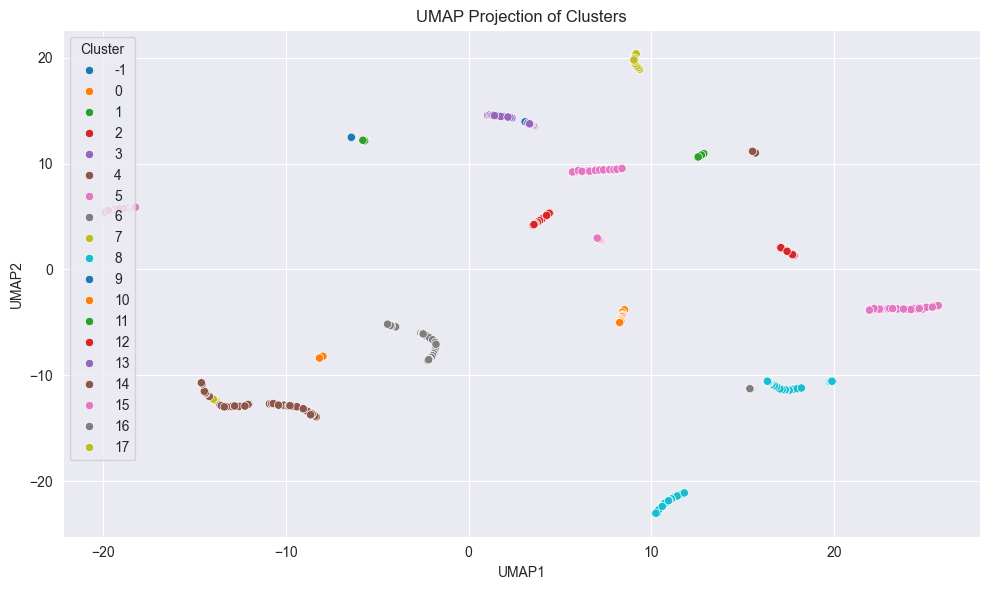

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap

# Same as above
X_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(x)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df["label"], palette="tab10")
plt.title("UMAP Projection of Clusters")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend(title="Cluster")
plt.tight_layout()

Looking at the first label found by unsupervised learning, it is visible that all students are female, except one. They are mostly undergraduates, however some of them are also in high school. Their ages range from 18 to 20. The majority of them use either Instagram or Tiktok. All of them have stated that their academic performance has suffered. Additionally, most of them get 3.8 to 6 hours of sleep per night. They all have an addiction score of 9.

 As there is a significant amount of labels, this study will not resume covering all of them.

In [54]:
df[df["label"] == 0]

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,...,Addicted_Score,Gender_Numeric,Most_Used_Platform_Numeric,Academic_Level_Numeric,Normalized_Addicted_Score,Relationship_Status_Numeric,Is_Graduate,In_Relationship,Affects_Academic_Performance_Numeric,label
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,...,9,0,6,2,0.9,0,0,0,1,0
13,14,18,Female,High School,Mexico,6.5,Instagram,Yes,5.5,5,...,9,0,1,1,0.9,2,0,0,1,0
25,26,19,Female,High School,Ireland,6.1,Instagram,Yes,5.2,5,...,9,0,1,1,0.9,0,0,0,1,0
37,38,19,Female,High School,UAE,6.2,Instagram,Yes,5.1,5,...,9,0,1,1,0.9,1,0,1,1,0
49,50,19,Female,High School,Ecuador,6.3,Instagram,Yes,5.2,5,...,9,0,1,1,0.9,0,0,0,1,0
79,80,18,Female,High School,Armenia,5.9,Instagram,Yes,5.2,5,...,9,0,1,1,0.9,0,0,0,1,0
89,90,18,Female,High School,Liechtenstein,5.8,Instagram,Yes,5.2,5,...,9,0,1,1,0.9,2,0,0,1,0
100,101,19,Male,High School,Lebanon,5.8,YouTube,Yes,5.2,5,...,9,1,11,1,0.9,0,0,0,1,0
220,221,19,Female,Undergraduate,USA,6.5,Instagram,Yes,6.0,5,...,9,0,1,2,0.9,2,0,0,1,0
326,327,20,Female,Undergraduate,USA,6.8,TikTok,Yes,5.5,5,...,9,0,6,2,0.9,1,0,1,1,0


## [](http://)Conclusion

In this project, the relationship between social media usage and sleep time among students at differing academic levels has been investigated. By means of descriptive statistics, regression analysis and clustering methods, several insight have been gained:
* **Use of social media differs significantly across academic levels, with high schools students reporting the highest addiction scores**
* **Addiction scores and sleep time per night are negatively correlated, suggesting that excessive social media use is connected to less sleep duration**
* **Machine Learning models such as regression analysis provided a limited predictive power. This shows that sleep time may be impacted by other factors beyond social media use**
* **Unsupervised clustering has found 18 distinct student profiles, which can be further analyzed in future investigations**